In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from bokeh.io import output_file, vplot
from bokeh.plotting import figure, show

%matplotlib inline

In [61]:
T = 1000 #per month
A0 = 10000
X0 = 5000
Y0 = 3000
Z0 = 1000

B = {'A':0.8,'X':0.6,'Y':0.5,'Z':0.5}
D = {'A':0.1,'X':0.4,'Y':0.35,'Z':0.4}
e = {'A':0.5,'X':0.6,'Y':0.4,'Z':0.2}
m = {'A':0.75,'X':0.6,'Y':0.5,'Z':0.3}

A = np.zeros(T); X = np.zeros(T); Y = np.zeros(T); Z = np.zeros(T)

A[0] = A0; X[0] = X0; Y[0] = Y0; Z[0] = Z0
dt = 0.05

def prob_rain(x):
    sigma = 30
    mu = 180
    p = 50*1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (x - mu)**2 / (2 * sigma**2))
    if p < 0.15:
        p = p + random.uniform(0,0.3)
        if p > 0.5:
            p = p - 0.1*p
    if p > 0.55:
        p = p - 0.1*p
    return p

def alpha(i,s):
    global X,Y,Z
    if s == 'X':
        if A[i]==0:
            alpha = -10
            return alpha
        else:
            alpha = X[i]/A[i]
    elif s == 'Y':
        if X[i] == 0:
            alpha = -10
            return alpha
        else: 
            alpha = Y[i]/X[i]
    elif s == 'Z':
        if Y[i] == 0:
            alpha = -10
            return alpha
        else:
            alpha = Z[i]/Y[i]
    else:
        return 0
        
    if alpha > 1.5:
        alpha = -10
    elif 0.8<alpha<1.5:
        alpha = 0
    elif alpha < 0.8:
        alpha = 5
        
    return alpha

def eat(i,s):
    if s == 'A':
        eat = e[s] + prob_rain(i)
    else:
        eat = e[s] - prob_rain(i) + alpha(i,s)
    return eat

def mate(i,s):
    mate = m[s] + prob_rain(i) 
    return mate

def beta(i,s):
    beta = eat(i,s) + mate(i,s) + B[s] - D[s]
    
    return beta

In [62]:
def run():
    for i in range(T-1):
        bA = beta(i,'A')
        bX = beta(i,'X')
        bY = beta(i,'Y')
        bZ = beta(i,'Z')

        A[i+1] = A[i] - dt*bX*X[i]
        X[i+1] = X[i] + dt*(bX*X[i] - bY*Y[i])
        Y[i+1] = Y[i] + dt*(bX*X[i] + bY*Y[i] - bZ*Z[i])
        Z[i+1] = Z[i] + dt*(bY*Y[i] + bZ*Z[i])

        if A[i+1] < 0:
            A[i+1] = 0
        if X[i+1] < 0:
            X[i+1] = 0
        if Y[i+1] < 0:
            Y[i+1] = 0
        if Z[i+1] < 0:
            Z[i+1] = 0
    return A, X, Y, Z

In [72]:
A, X, Y, Z = run()

In [73]:
output_file('graph1.html', title='Graph 1')
t = np.arange(1,T+1)

p = figure(title='Dynamical Complex System',
             plot_height=400, plot_width=1000,
             x_range=(0, T), y_range=(1500, 12000),
             toolbar_location=None)
data = [A,X,Y,Z]
name = ['A','X','Y','Z']
color = ['green','blue','red','olive']

for i in range(len(data)):
    p.line(x=t, y=data[i],line_width=1.5, color=color[i],  alpha=0.5,legend= name[i])
    p.xaxis.axis_label = 'Time'
    p.yaxis.axis_label = 'Number of Species'

#p.line(x=t, y=X, color='blue',  alpha=0.5,legend= 'X')
#p.line(x=t, y=Y, color='red',  alpha=0.5,legend= 'Y')
#p.line(x=t, y=Z, color='yellow',  alpha=0.5,legend= 'Z')

p.legend.location = 'top_left'
show(p)

INFO:bokeh.core.state:Session output file 'graph1.html' already exists, will be overwritten.


In [74]:
output_file('graph2.html', title='Graph 2')
p1 = figure(title='Species A',plot_height = 150,plot_width=1000,x_range=(0,T),y_range=(1500,12000),toolbar_location=None)
p1.line(x=t,y=A,color='green',alpha=0.5)
p1.xaxis.axis_label = 'Time'
p1.yaxis.axis_label = 'Number of Species'

p2 = figure(title='Species B',plot_height = 150,plot_width=1000,x_range=(0,T),y_range=(1500,12000),toolbar_location=None)
p2.line(x=t,y=X,color='blue',alpha=0.5)
p2.xaxis.axis_label = 'Time'
p2.yaxis.axis_label = 'Number of Species'

p3 = figure(title='Species Y',plot_height = 150,plot_width=1000,x_range=(0,T),y_range=(1500,12000),toolbar_location=None)
p3.line(x=t,y=Y,color='red',alpha=0.5)
p3.xaxis.axis_label = 'Time'
p3.yaxis.axis_label = 'Number of Species'

p4 = figure(title='Species Z',plot_height = 150,plot_width=1000,x_range=(0,T),y_range=(1500,12000),toolbar_location=None)
p4.line(x=t,y=Z,color='olive',alpha=0.5)
p4.xaxis.axis_label = 'Time'
p4.yaxis.axis_label = 'Number of Species'

pp = vplot(p1,p2,p3,p4)
show(pp)

INFO:bokeh.core.state:Session output file 'graph2.html' already exists, will be overwritten.
C:\ProgramData\Anaconda3\lib\site-packages\bokeh\util\deprecation.py:34: BokehDeprecationWarning: bokeh.io.vplot() was deprecated in Bokeh 0.12.0 and will be removed, use bokeh.models.layouts.Column instead.
  warn(message)


In [75]:
output_file('graph3.html', title='Graph 3')

p = figure(title='Dynamical Complex System',
             plot_height=400, plot_width=600,
             x_range=(0, 11), y_range=(0, 12000),
             toolbar_location=None)

for i in range(len(data)):
    p.line(x=t[:10], y=data[i][:10],line_width=1.5, color=color[i],  alpha=0.5,legend= name[i])
    p.xaxis.axis_label = 'Time'
    p.yaxis.axis_label = 'Number of Species'

p.legend.location = 'top_left'

show(p)

INFO:bokeh.core.state:Session output file 'graph3.html' already exists, will be overwritten.


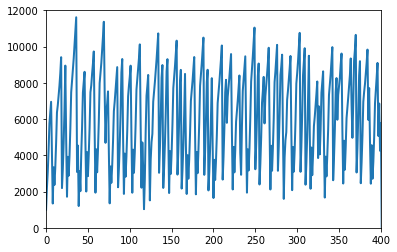

In [45]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

T = 1000 #per month
A0 = 10000
X0 = 5000
Y0 = 3000
Z0 = 1000

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0,400), ylim=(0, 12000))
line, = ax.plot([], [], lw=2)

B = {'A':0.8,'X':0.6,'Y':0.5,'Z':0.5}
D = {'A':0.1,'X':0.4,'Y':0.35,'Z':0.4}
e = {'A':0.5,'X':0.6,'Y':0.4,'Z':0.2}
m = {'A':0.75,'X':0.6,'Y':0.5,'Z':0.3}

A = np.zeros(T); X = np.zeros(T); Y = np.zeros(T); Z = np.zeros(T)

A[0] = A0; X[0] = X0; Y[0] = Y0; Z[0] = Z0
dt = 0.05

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = np.arange(T)
    bA = beta(i,'A')
    bX = beta(i,'X')
    bY = beta(i,'Y')
    bZ = beta(i,'Z')
    
    A[i+1] = A[i] - dt*bX*X[i]
    X[i+1] = X[i] + dt*(bX*X[i] - bY*Y[i])
    Y[i+1] = Y[i] + dt*(bX*X[i] + bY*Y[i] - bZ*Z[i])
    Z[i+1] = Z[i] + dt*(bY*Y[i] + bZ*Z[i])
    
    if A[i+1] < 0:
        A[i+1] = 0
    if X[i+1] < 0:
        X[i+1] = 0
    if Y[i+1] < 0:
        Y[i+1] = 0
    if Z[i+1] < 0:
        Z[i+1] = 0
        
    line.set_data(x, Z)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=400, interval=80,blit=True)


HTML(anim.to_html5_video())